<a href="https://colab.research.google.com/github/namoshi/colab/blob/master/simple_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms

In [10]:
def try_gpu(e):
    if torch.cuda.is_available():
        return e.cuda()
    return e

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device:', device)

device: cuda


In [15]:
# mini-batch size
nbatch = 100

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=nbatch,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=nbatch,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


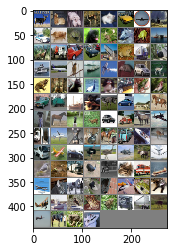

 deer   cat   dog  deer   cat   car plane  deer   car   cat  frog   dog  deer horse  frog  ship  deer truck   car   car truck  frog truck  bird  ship plane  bird  ship plane   cat   car  deer  frog  deer horse  bird   dog   car  frog  bird   car truck  ship   dog  bird   car plane horse   dog horse  bird  deer   car truck horse plane truck plane   dog  deer horse   car  ship  deer truck plane   car  bird  bird plane  deer plane  bird  frog truck  bird horse   cat truck  ship plane   cat horse   cat   cat  bird  frog   cat plane  ship  bird  frog  frog truck truck  bird plane horse  frog  ship


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(nbatch)))

In [17]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)
net = try_gpu(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [18]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [36]:
nepochs = 20
for epoch in range(nepochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = try_gpu(inputs)
        labels = try_gpu(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 0.892
[1,   200] loss: 0.878
[1,   300] loss: 0.905
[1,   400] loss: 0.884
[1,   500] loss: 0.903
[2,   100] loss: 0.868
[2,   200] loss: 0.869
[2,   300] loss: 0.895
[2,   400] loss: 0.895
[2,   500] loss: 0.885
[3,   100] loss: 0.866
[3,   200] loss: 0.868
[3,   300] loss: 0.894
[3,   400] loss: 0.859
[3,   500] loss: 0.869
[4,   100] loss: 0.851
[4,   200] loss: 0.875
[4,   300] loss: 0.859
[4,   400] loss: 0.870
[4,   500] loss: 0.861
[5,   100] loss: 0.832
[5,   200] loss: 0.855
[5,   300] loss: 0.851
[5,   400] loss: 0.880
[5,   500] loss: 0.853
[6,   100] loss: 0.823
[6,   200] loss: 0.855
[6,   300] loss: 0.866
[6,   400] loss: 0.831
[6,   500] loss: 0.830
[7,   100] loss: 0.819
[7,   200] loss: 0.826
[7,   300] loss: 0.836
[7,   400] loss: 0.843
[7,   500] loss: 0.826
[8,   100] loss: 0.814
[8,   200] loss: 0.821
[8,   300] loss: 0.834
[8,   400] loss: 0.836
[8,   500] loss: 0.809
[9,   100] loss: 0.804
[9,   200] loss: 0.808
[9,   300] loss: 0.809
[9,   400] 

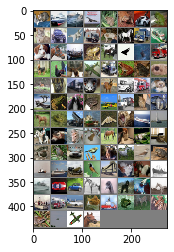

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse plane  deer truck   dog  bird  deer plane truck  frog  frog   dog  deer   dog truck  bird  deer   car truck   dog  deer  frog   dog  frog plane truck   cat truck horse  frog truck  ship plane   cat  ship  ship horse horse  deer  frog horse   cat  frog   cat  frog  bird   car  bird   cat horse  bird  frog  ship  ship plane  bird truck   cat   cat  ship  ship   car   car horse  bird   dog  bird horse  ship truck plane   cat  ship  frog  deer  frog  frog plane plane horse
Predicted:     deer horse  ship  frog   dog plane  frog  bird   cat   dog  frog   cat  frog  frog  deer   cat   dog   car plane   cat horse   car horse   dog   car horse   cat truck truck horse  frog truck horse plane  ship  bird  frog plane truck  deer   cat  bird truck  bird  bird  bird  frog   dog   dog  frog  ship  ship  ship truck  bird  frog  bird   cat  deer truck  bird   car 

In [37]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(nbatch)))

_, predicted = torch.max(outputs, 1)
print('Predicted:   ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(nbatch)))

In [38]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = try_gpu(images)
        labels = try_gpu(labels)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 64 %


In [39]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = try_gpu(images)
        labels = try_gpu(labels)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(nbatch):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 69 %
Accuracy of   car : 79 %
Accuracy of  bird : 52 %
Accuracy of   cat : 39 %
Accuracy of  deer : 58 %
Accuracy of   dog : 53 %
Accuracy of  frog : 83 %
Accuracy of horse : 65 %
Accuracy of  ship : 74 %
Accuracy of truck : 72 %
